# Метод головних компонент

В цьому завданні вам буде запропоновано ознайомитися з підходом, який перевідкривався у дуже  різних областях, має безліч різних інтерпретацій, а також кілька цікавих узагальнень: методом головних компонент (principal component analysis).

## Programming assignment

Завдання розбите на дві частини:
- робота з модельними даними,
- робота з реальними даними.

В кінці кожного пункту від вас вимагається отримати відповідь і завантажити в текстовий файл.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

## Теорія

Будь-який набір даних можна подати як матрицю $ X $.

Метод головних компонент послідовно знаходить наступні лінійні комбінації ознак (компоненти) з $ X $:
- кожна компонента ортогональна всім іншим і нормована: $ <w_i, w_j> = 0, \quad || w_i || = 1 $,
- кожна компонента описує максимально можливу дисперсію даних (з урахуванням попереднього обмеження).

Припущення, в рамках яких даний підхід буде працювати добре:
- лінійність компонент: ми припускаємо, що дані можна аналізувати лінійними методами,
- великі дисперсії важливі: передбачається, що найбільш важливі ті напрямки в даних, уздовж яких вони мають найбільшу дисперсію,
- всі компоненти ортогональні: це припущення дозволяє проводити аналіз головних компонент за допомогою технік лінійної алгебри (наприклад, сингулярне розкладання матриці $ X $ або власний розклад матриці $ X ^ TX $).

Як це виглядає математично?

Позначимо наступним чином матрицю коваріації даних: $ \hat {C} \propto Q = X ^ TX $. ($ Q $ відрізняється від $ \hat {C} $ нормуванням на число об'єктів).

Сингулярне розкладання матриці $ Q $ виглядає наступним чином:

$$ Q = X ^ TX = W \Lambda W ^ T $$

Можна строго показати, що стовпці матриці $ W $ є головними компонентами матриці $ X $, тобто комбінаціями ознак, які відповідають двом умовам, зазначеним на початку. При цьому дисперсія даних вздовж напрямку, заданого кожною компонентою, дорівнює відповідному значенню діагональної матриці $ \Lambda $.

Як же на підставі цього перетворення зменшити розмірність? Ми можемо відранжувати  компоненти, використовуючи значення дисперсій даних уздовж них.

Зробимо це: $ \lambda_{(1)}> \lambda_{(2)}> \dots> \lambda_{(D)} $.

Тоді, якщо ми виберемо компоненти, що відповідають першим $ d $ дисперсіям з цього списку, ми отримаємо набір з $ d $ нових ознак, які найкращим чином описують дисперсію початкового набору даних серед всіх інших можливих лінійних комбінацій вихідних ознак матриці $ X $.
- Якщо $ d = D $, то ми взагалі не втрачаємо жодної інформації.
- Якщо $ d <D $, то ми втрачаємо інформацію, яка, при справедливості зазначених вище припущень, буде пропорційна сумі дисперсій відкинутих компонент.

Виходить, що метод головних компонент дозволяє нам ранжувати отримані компоненти по "значущості", а також запустити процес їх відбору.

## Приклад

Розглянемо набір даних, який семплірувався з багатовимірного нормального розподілу з матрицею коваріації $C = \begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix}$.

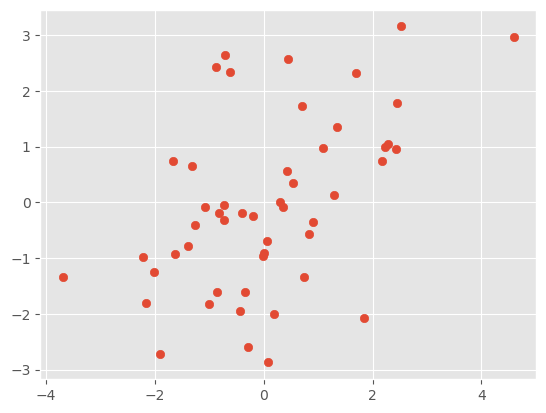

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

Шляхом діагоналізації істинної матриці ковариаций $ C $, ми можемо знайти перетворення вихідного набору даних, компоненти якого найкращим чином будуть описувати дисперсію, з урахуванням їх ортогональності один одному:

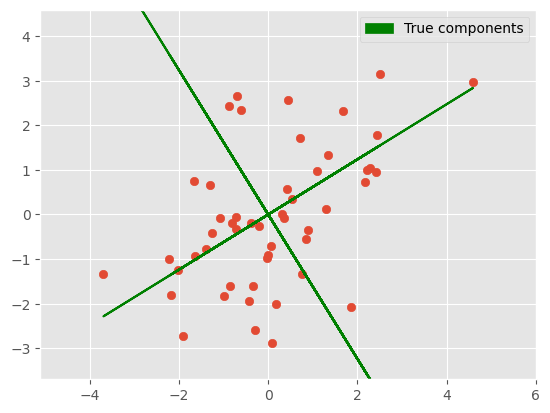

In [3]:
# Обчислимо власні значення і праві власні вектори квадратного масиву.
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])

# побудуємо істинні  компоненти, уздовж яких максимальна дисперсія даних
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

А тепер порівняємо ці напрямки з напрямками, які вибирає метод головних компонент:

In [4]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # зробимо графіки гарними:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

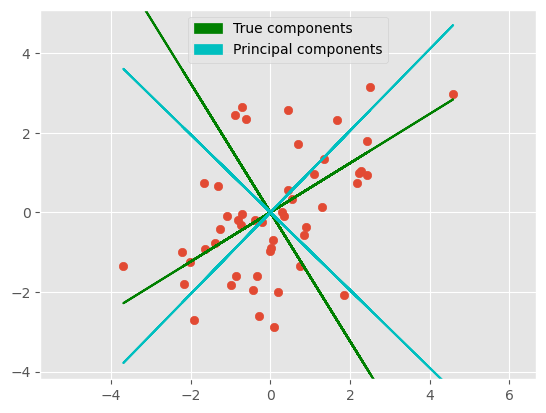

In [5]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# побудуємо істинні  компоненти, уздовж яких максимальна дисперсія даних
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# побудуємо істинні  компоненти з використанням методу PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

Бачимо, що вже при невеликій кількості даних вони відрізняються незначно. Збільшимо розмір вибірки:

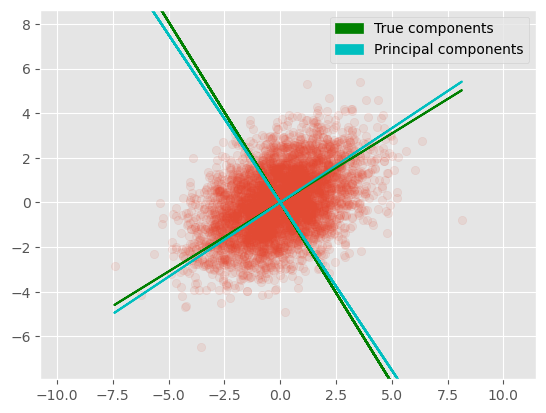

In [6]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# побудуємо істинні  компоненти, уздовж яких максимальна дисперсія даних
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# побудуємо істинні  компоненти з використанням методу PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

У цьому випадку головні компоненти значно точніше наближають справжні напрямки даних, уздовж яких спостерігається найбільша дисперсія.

Значення $\mathcal{L}$ має сенс логарифму ймовірності отримання набору даних $X$ за умови, що він задовольняє припущенням моделі методу основних компонентів. Чим воно більше - тим краще модель описує дані, що спостерігаються.


## Статистичний погляд на модель

Як формалізувати припущення методу, що зазначені вище? За допомогою імовірнісної моделі!

Завдання, що стоїть за будь-яким методом зменшення розмірності: отримати з набору зашумлених ознак $ X $ істинні значення $ Y $, які насправді визначають набір даних (тобто зведення датасета з великою кількістю ознак до даних, які мають так звану  "ефективну розмірність").

У разі методу головних компонент ми хочемо знайти напрямки, уздовж яких максимальна дисперсія, з урахуванням описаних вище припущень про структуру даних і компонент.


Матеріал, описаний нижче в цій секції, не обов'язковий для ознайомлення для виконання наступного завдання, тому що вимагає деяких знань статистики.

Для тих, хто збирається його пропустити: в кінці розділу ми отримаємо метрику якості, яка повинна визначати, наскільки дані добре описуються побудованою моделлю при заданому числі компонент. Відбір ознак при цьому зводиться до того, що ми вибираємо ту кількість компонент, при якому використовується метрика (логарифм правдоподібності) є максимальною.

З урахуванням припущень задача методу головних компонент виглядає наступним чином:

$$ x = Wy + \mu + \epsilon $$

де:
- $ x $ - спостережувані дані
- $ W $ - матриця головних компонент (кожен стобец - одна компонента)
- $ y $ - їх проекція на головні компоненти
- $ \mu $ - середній спостережуваних даних
- $\epsilon \sim \mathcal{N}(0, \sigma^2I)$ - нормальний шум

Виходячи з розподілу шуму, випишемо розподіл на $ x $:

$$p(x \mid y) = \mathcal{N}(Wx + \mu, \sigma^2I) $$

Введемо апріорне розподіл на $ y $:

$$ p (y) = \mathcal{N}(0, 1) $$

Виведемо з цього за допомогою формули Байеса маргінальний розподіл на $ p (x) $:

$$ p (x) = \mathcal{N} (\mu, \sigma ^ 2I + WW ^ T) $$

Тоді правдоподібність набору даних за умови використовуваної моделі виглядає наступним чином:

$$\mathcal{L} = \sum_{i=1}^N \log p(x_i) = -N/2 \Big( d\log(2\pi) + \log |C| + \text{tr}(C^{-1}S) \Big)$$

де:
- $ C = \sigma ^ 2I + WW ^ T $ - матриця коваріації в маргінальної моделі
- $S = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)(x_i - \mu)^T$ - вибіркова коваріація

Значення $ \mathcal{L} $ має зміст логарифма ймовірності отримання набору даних $ X $ за умови, що він задовольняє припущеннями моделі методу головних компонент. Чим воно більше - тим краще модель описує спостережувані дані.

## Завдання 1. Автоматичне зменшення розмірності даних за допомогою логарифма правдоподібності $ \mathcal{L} $

Розглянемо набір даних розмірності $ D $, чия реальна розмірність значно менше за ту, що спостерігається (назвемо її $ d $). Від вас вимагається:

1. Для кожного значення $ \hat{d} $ в інтервалі [1, D] побудувати модель PCA з $ \hat {d} $ головними компонентами.
2. Оцінити середній логарифм правдоподібності даних для кожної моделі на генеральній сукупності, використовуючи метод крос-валідації з 3 фолдами (підсумкова оцінка значення логарифма правдоподібності усредняется по всіх фолдах).
3. Знайти модель, для якої він максимальний, і внести в файл відповіді число компонент в даній моделі, тобто значення $ \hat{d}_{opt} $.

Для оцінки логарифма правдоподібності моделі для заданого числа головних компонент за допомогою методу крос-валідації використовуйте наступні функції:

    model = PCA(n_components = n)
    scores = cv_score(model, data)
        
Зверніть увагу, що scores - це вектор, довжина якого дорівнює числу фолдов. Для отримання оцінки на правдоподібність моделі його значення потрібно усереднити.

Для візуалізації оцінок можете використати таку функцію:

    plot_scores(d_scores)
    
якій на вхід передається вектор отриманих оцінок логарифма правдоподібності даних для кожного $ \hat{d} $.

Для зацікавлених: дані для завдань 1 і 2 були сгенерірованни відповідно до передбачуваної PCA моделі. Тобто: дані $ Y $ з ефективною розмірністю $ d $, отримані з незалежних рівномірних розподілів, лінійно траснформірованої випадкової матриці $ W $ в простір розмірністю $ D $, після чого до всіх ознаками був доданий незалежний нормальний шум з дисперсією $ \sigma $ .

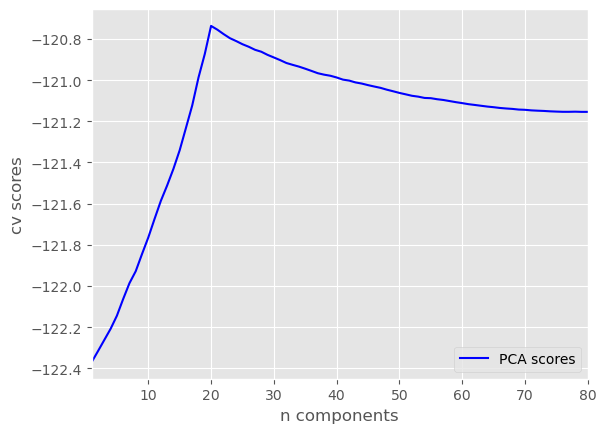

ans1 = 20


In [7]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task1.csv')

# place your code here
# pass

d_scores = np.empty(data.shape[1])
d_values = np.arange(1, data.shape[1]+1)

for index, d_num in enumerate(d_values):
    model_PCA = PCA(n_components=d_num, svd_solver='full')
    model_PCA.fit(data)
    d_scores[index] = np.mean(cv_score(model_PCA, data))

plot_scores(d_scores)

ind_max1 = np.argmax(d_scores)
ans1 = d_values[ind_max1]

write_answer_1(ans1)
print("ans1 =", ans1)

## Варіаційний погляд на модель

Ми знаємо, що кожній головній компоненті відповідає описувана їй дисперсія даних (дисперсія даних при проекції на цю компоненту). Вона чисельно дорівнює значенню діагональних елементів матриці $ \Lambda $, одержаної з спектрального розкладання матриці коваріації даних (дивись теорію вище).

Виходячи з цього, ми можемо впорядкувати дисперсію даних уздовж цих компонент за зменшенням, і зменшити розмірність даних, відкинувши $ q $ підсумкових головних компонент, що мають найменшу дисперсію.

Робити це можна двома різними способами. Наприклад, якщо ви в подальшому навчаєте на даних зі зменшеною розмірністю модель класифікації або регресії, то можна запустити ітераційний процес: видаляти компоненти з найменшою дисперсією по одній, поки якість підсумкової моделі не стане значно гірше.

Більш загальний спосіб відбору ознак полягає в тому, що ви можете подивитися на різниці в дисперсіях в відсортованому ряді $\lambda_{(1)} > \lambda_{(2)} > \dots > \lambda_{(D)}$: $\lambda_{(1)}-\lambda_{(2)}, \dots, \lambda_{(D-1)} - \lambda_{(D)}$, і видалити ті компоненти, на яких різниця буде найбільшою. Саме цим методом вам і пропонується скористатися для тестового набору даних.

## Завдання 2. Ручне зменшення розмірності ознак за допомогою аналізу дисперсії даних уздовж головних компонент

Розглянемо ще один набір даних розмірності $ D $, чия реальна розмірність значно менше ніж та, що спостерігається (назвемо її також $ d $). Від вас вимагається:

1. Побудувати модель PCA з $ D $ головними компонентами за цими даними.
2. Спроектувати дані на головні компоненти.
3. Оцінити їх дисперсію уздовж головних компонент.
4. Відсортувати дисперсії в порядку зменшення і отримати їх попарні різниці: $ \lambda_{(i-1)} - \lambda_{(i)} $.
5. Знайти різницю з найбільшим значенням і отримати по ній оцінку на ефективну розмірність даних $ \hat{d} $.
6. Побудувати графік дисперсій і переконатися, що отримана оцінка на $ \hat{d}_{opt} $ дійсно має сенс, після цього внести отримане значення $ \hat{d}_{opt} $ в файл відповіді.

Для побудови моделі PCA використовуйте функцію:

    model.fit(data)
    
Для трансформації даних використовуйте метод:

    model.transform(data)
    
Оцінку дисперсій на трансформованих даних від вас буде потрібно реалізувати вручну. Для побудови графіків можна скористатися функцією

    plot_variances(d_variances)
    
якої слід передати на вхід відсортований за зменшенням  вектор дисперсій уздовж компонент.

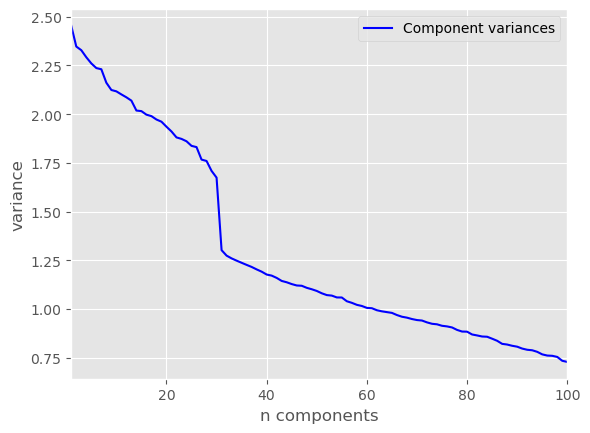

ans2 = 30


In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')

# place your code here
# pass
model_PCA = PCA(svd_solver='full')
model_PCA.fit(data)
model_PCA.transform(data)

d_variances = model_PCA.explained_variance_
plot_variances(d_variances)

diff_var = d_variances[:-1] - d_variances[1:] # попарні різниці дисперсій
ans2 = np.argmax(diff_var) + 1  # ефективна кількість вимірів

write_answer_2(ans2)
print("ans2 =", ans2)

## Інтерпретація головних компонент

В якості головних компонент ми отримуємо лінійні комбінації вихідних ознак, тому резонно виникає питання про їх інтерпретацію.

Для цього існує кілька підходів, ми розглянемо два:
- розрахувати взаємозв'язок головних компонент з вихідними ознаками
- розрахувати внески кожного конкретного спостереження в головні компоненти

Перший спосіб підходить в тому випадку, коли всі об'єкти з набору даних не несуть для нас ніякої семантичної інформації, яка вже не відображена в наборі ознак.

Другий спосіб підходить для випадку, коли дані мають більш складну структуру. Наприклад, обличчя для людини несуть більший семантичний сенс, ніж вектор значень пікселів, які аналізує PCA.

Розглянемо докладніше спосіб 1: він полягає в підрахунку коефіцієнтів кореляцій між вихідними ознаками і набором головних компонент.

Так як метод головних компонент є лінійним, то пропонується для аналізу використовувати кореляцію Пірсона, вибірковий аналог якої має наступну формулу:

$$r_{jk} = \frac{\sum_{i=1}^N (x_{ij} - \bar{x}_j) (y_{ik} - \bar{y}_k)}{\sqrt{\sum_{i=1}^N (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^N (y_{ik} - \bar{y}_k)^2}} $$

де:
- $ \bar{x}_j $ - середнє значення j-ї ознаки,
- $ \bar{y}_k $ - середнє значення проекції на k-ю головну компоненту.

Кореляція Пірсона є мірою лінійної залежності. Вона дорівнює 0 в разі, коли величини незалежні, і $ \pm 1 $, якщо вони лінійно залежні. Виходячи зі ступеня кореляції нової компоненти з вихідними ознаками, можна будувати її семантичну інтерпретацію, тому що зміст  вихідних ознак ми знаємо.

## Завдання 3. Аналіз головних компонент за допомогою кореляцій з вихідними ознаками.

1. Навчіть метод головних компонент на датасета iris, отримайе перетворені дані.
2. Порахуйте кореляції вихідних ознак з їх проекціями на перші дві головні компоненти.
3. Для кожної ознаки знайдіть компоненту (з двох побудованих), з якої він корелює найбільше.
4. На підставі п.3 згрупуйте ознаки за компонентами. Складіть два списки: список номерів ознак, які сильніше корелюють з першою компонентою, і такий же список для другої. Нумерацію починати з одиниці. Передайте обидва списки функції write_answer_3.

Набір даних складається з 4 ознак, для 150 ірисів. Кожен з них належить одному з трьох видів. Візуалізацію проекції даного датасета на дві компоненти, які описують найбільшу дисперсію даних, можна отримати за допомогою функції

    plot_iris(transformed_data, target, target_names)
    
на вхід якого потрібно подати дані, перетворені за допомогою PCA, а також інформацію про класи. Колір точок відповідає одному з трьох видів ірису.

Для того щоб отримати імена вихідних ознак, використовуйте наступний список:

    iris.feature_names
    
При обчисленнв не забудьте центрувати ознаки і проекції на головні компоненти (віднімати з них середнє).

In [9]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# завантажимо датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names


# place yourcode here

print("Iмена вихідних ознак")
iris.feature_names

Iмена вихідних ознак


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
from scipy.stats import pearsonr

In [11]:
model_PCA = PCA(svd_solver='full')
data_fit = model_PCA.fit(data)
data_transformed = data_fit.transform(data)

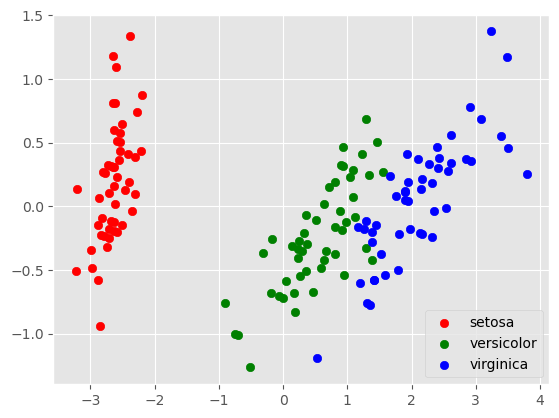

In [12]:
plot_iris(data_transformed, target, target_names)

In [14]:
pearsonr_dim = []
for d_num in np.arange(data.shape[1]):
    pearsr_1, _ = pearsonr(data[:,d_num], data_transformed[:,0])
    pearsr_2, _ = pearsonr(data[:,d_num], data_transformed[:,1])
    pearsonr_dim.append([pearsr_1, pearsr_2])

list_1, list_2 = [], []
for i, corr in enumerate(pearsonr_dim):
    #print('Кореляція ознаки №{} з PCA (методу головних компонент): {}'.format(i, corr))
    if (np.argmax(np.abs(corr)) == 0):
        list_1.append(i+1)
    else:
        list_2.append(i+1)

write_answer_3(list_1, list_2)
ans3 = [list_1, list_2]
print("ans3 =", ans3)

ans3 = [[1, 3, 4], [2]]


## Інтерпретація головних компонент з використанням даних

Розглянемо тепер величину, яку можна проінтерпретувати, як квадрат косинуса кута між об'єктом вибірки і головною компонентою:

$$ cos^2_{ik} = \frac{f_{ik}^2}{\sum_{\ell=1}^d f_{i\ell}^2} $$

де
- i - номер об'єкта
- k - номер головної компоненти
- $ f_{ik} $ - модуль центрованої проекції об'єкта на компоненту

Очевидно, що

$$ \sum_{k=1}^d cos^2_{ik} = 1 $$

Це означає, що для кожного об'єкта ми у вигляді даної величини отримали ваги, пропорційні внеску, яку вносить даний об'єкт в дисперсію кожної компоненти. Чим більше внесок, тим більше значущий об'єкт для опису конкретної головної компоненти.

## Завдання 4. Аналіз головних компонент за допомогою вкладів в їх дисперсію окремих об'єктів

1. Завантажте датасета осіб Olivetti Faces і навчіть на ньому модель RandomizedPCA (використовується при великій кількості ознак і працює швидше, ніж звичайний PCA). Отримайте проекції ознак на 10 перших головних компонент.
2. Порахуйте для кожного об'єкта його відносний внесок в дисперсію кожної з 10 компонент, використовуючи формулу з попереднього розділу (d = 10).
3. Для кожної компоненти знайдіть і візуалізуйте обличчя, яка вносить найбільший відносний внесок в неї. Для візуалізації використовуйте функцію

        plt.imshow(image.reshape(image_shape))
        
4. Передайте в функцію write_answer_4 список номерів осіб з найбільшим відносним внеском в дисперсію кожної з компонент, список починається з 0.

In [15]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))

data = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)

In [16]:
model_RandPCA = PCA(n_components=10, svd_solver='randomized')
data_transformed = model_RandPCA.fit_transform(data)

In [17]:
def cosine2_metric(x, i):
    return (x[i]**2 / np.sum(x**2))

In [18]:
cos2_matrix = []
for i, item in enumerate(data_transformed):
    cos2_matrix_obj = []
    for j in np.arange(len(item)):
        cos2_matrix_obj.append(cosine2_metric(item, j))
    cos2_matrix.append(cos2_matrix_obj)

ans4 = np.argmax(cos2_matrix, axis=0)

write_answer_4(ans4)
print("ans4 = ", ans4)

ans4 =  [197  18  66 319 363 131 142 382 353 140]


## Аналіз основних недоліків методу головних компонент

Розглянуті вище завдання є, безумовно, модельними, тому що дані для них були згенеровані відповідно до припущень методу головних компонент. На практиці ці припущення, природно, виконуються далеко не завжди. Розглянемо типові помилки PCA, які слід мати на увазі перед тим, як його застосовувати.

### Напрями з максимальною дисперсією в даних неортогональної

Розглянемо випадок вибірки, яка згенерована з двох витягнутих нормальних розподілів:

C:\Users\Admin\AppData\Local\Temp\ipykernel_11112\1018989238.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(mu, C2, size=50)])


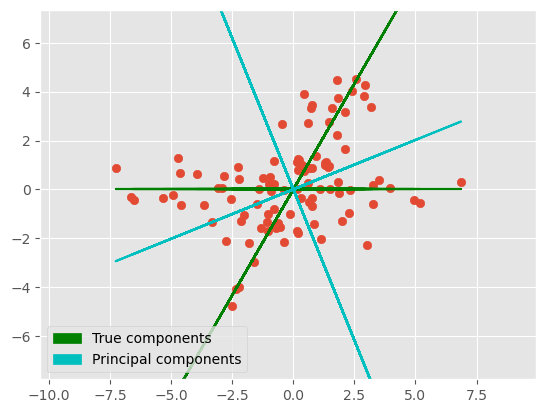

In [19]:
C1 = np.array([[10,0],[0,0.5]])
phi = np.pi/3
C2 = np.dot(C1, np.array([[np.cos(phi), np.sin(phi)],
                          [-np.sin(phi),np.cos(phi)]]))

data = np.vstack([np.random.multivariate_normal(mu, C1, size=50),
                  np.random.multivariate_normal(mu, C2, size=50)])
plt.scatter(data[:,0], data[:,1])
# Побудуємо істинні компоненти, які нас цікавлять 
plt.plot(data[:,0], np.zeros(data[:,0].size), color="g")
plt.plot(data[:,0], 3**0.5*data[:,0], color="g")
# Навчимо модель  pca і побудуємо головні компоненти
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

У чому проблема, чому pca тут працює погано? Відповідь проста: компоненти, що нас цікавлять, корельовані  між собою (або неортогональної, в залежності від того, якою термінологією користуватися). Для пошуку подібних перетворень потрібні більш складні методи, які вже виходять за рамки методу головних компонент.

Для зацікавлених: то, що можна застосувати безпосередньо до  методу головних компонент, для отримання подібних неортогональних перетворень, називається методами ротації. Почитати про них можна в зв'язку з іншим методом зменшення розмірності, який називається Factor Analysis (FA), але нічого не заважає їх застосовувати і до головних компонентів.

### Цікавий напрямок в даних не збігається з напрямком максимальної дисперсії

Розглянемо приклад, коли дисперсії не відображають цікавлячих нас напрямків в даних:

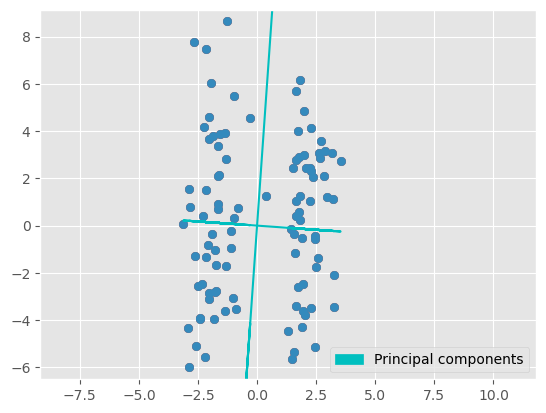

In [20]:
C = np.array([[0.5,0],[0,10]])
mu1 = np.array([-2,0])
mu2 = np.array([2,0])

data = np.vstack([np.random.multivariate_normal(mu1, C, size=50),
                  np.random.multivariate_normal(mu2, C, size=50)])
plt.scatter(data[:,0], data[:,1])
# Навчимо модель pca і побудуємо головні компоненти
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model)
plt.draw()

Очевидно, що в даному випадку метод головних компонент буде вважати вертикальну компоненту більш значущою для опису набору даних, ніж горизонтальну.

Але, наприклад, в разі, коли дані з лівого і правого кластера належать до різних класів, для їх лінійної роздільності вертикальна компонента є шумововою. Незважаючи на це, метод головних компонент ніколи її шумовою не визнає, і є ймовірність, що відбір ознак з його допомогою викине з ваших даних значущі для розв'язуваної вами завдання компоненти просто тому, що вздовж них значення мають низьку дисперсію.

Справлятися з такими ситуаціями можуть деякі інші методи зменшення розмірності даних, наприклад, метод незалежних компонент (Independent Component Analysis, ICA).